In [1]:
import numpy as np
from scipy.ndimage import imread
import matplotlib.pyplot as plt
import fourier_transform as ft
import seaborn as sns
from scipy import fftpack
% matplotlib inline

In [2]:
sns.set_context("notebook",font_scale=1.5)

## Working on orientation

In [29]:
# sweet_image_descriptions = {
# #                 31:"oregon trail",
# # #                 33:"puppies!",
# # #                 55:"caw caw, motherfucker",
# # #                 57:"ugly duck",
# # #                 81:"wood paneling",
# # #                 113:"pencils vertical",
# # #                 114:"pencils horizontal",
# # #                 115:"georgia o'keefe",
# #                 85:"actually windows",
# # #                 88:"crappy leaves",
# #                 86:"windows 1",
#                 87:"leaves",
#                 }

sweet_image_descriptions = { n : "Natural Scene " + str(n) for n in range(118)}

sweet_images = [
    {"id" : img_id,
     "description" : description,
     "image" : imread('/Users/sekunder/python/SWDB/SWDB-KART/images/NS_stimulus_images/NS_' + str(img_id) + '.png',
                      flatten = True)
    } for img_id,description in sweet_image_descriptions.items()]
sweet_images.sort(key=lambda x : x["id"])

print('We got ' + str(len(sweet_images)) + ' sweet images!')

We got 118 sweet images!


In [31]:
# pct_trials = [0.01, 0.03, 0.05, 0.07, 0.09]
pct_trials = [
#     0.01,
#     0.05,
    0.07
#     0.1,
]
num_pie_slices = 72
theta = [2 * n * np.pi / num_pie_slices for n in range(num_pie_slices)]
# pct = 0.05
for pct in pct_trials:
    pct_str = str(int(pct*100))
    for d in sweet_images:
        shifted_img, log_fft_img = ft.log_fourier_transform(d["image"])
        d["log_fft_image"] = log_fft_img

        fig = plt.figure(figsize=(12,10))

        a = fig.add_subplot(2,2,1)
        plt.title(d["description"])
        plt.imshow(shifted_img,cmap='gray',interpolation='nearest')
        plt.axis('off')
        
        a = fig.add_subplot(2,2,2)
        im = a.imshow(log_fft_img,interpolation='nearest',cmap='jet')
        plt.colorbar(im, fraction=0.03, pad=0.04)
        plt.title("Fourier Transform")
        plt.axis('off')

        # now the big guns:
        # get the raw fourier transformed image:
        fft_raw = np.abs(fftpack.fftshift(fftpack.fft2(shifted_img)))
        threshold = pct * np.max(fft_raw)
        (x,y) = np.where(fft_raw > threshold)
        fft_threshold = fft_raw * (fft_raw > threshold)

        a = fig.add_subplot(2,2,3)
        plt.title("FFT, thresholded above " + pct_str + "% of peak")
        im = plt.imshow(fft_threshold[np.min(x)-10:np.max(x)+10,np.min(y)-10:np.max(y)+10],interpolation='nearest',cmap='jet')
        plt.colorbar(im, fraction=0.046, pad=0.04)
        plt.axis('off')
        
        a = fig.add_subplot(2,2,4)
        M,N = fft_raw.shape
        x_0,y_0 = float(M)/2, float(N)/2
        r = np.hypot(x_0 - np.min(x), y_0 - np.min(y)) #overshooting a bit but that's ok.
        theta_arr,intensity = ft.radial_image_intensity(log_fft_img, x_0, y_0, r, theta, num_interp_points=1000)
        coarse_theta,coarse_intensity = ft.radial_image_intensity(log_fft_img, x_0, y_0, r, num_interp_points=1000)
        
        plt.title("Orientation profile")
        a.plot([t * 180/np.pi for t in theta_arr],intensity)
        a.scatter([t * 180/np.pi for t in coarse_theta],coarse_intensity)
        plt.xlabel('Orientation')
        plt.ylabel('Avg. intensity around center')
        plt.xlim(0,180)
        plt.tight_layout()
        
        fig.savefig('/Users/sekunder/python/SWDB/SWDB-KART/images/NS_orientation_profiles/NS_' + str(d['id']) + '_orientation_profile.png')
        
        plt.close(fig)

#         d["orientation " + pct_str + "%"] = ft.image_orientation(d["image"],fraction_of_peak=pct,degrees=True)
#         print('Orientation of ' + d["description"] + ', computed using ' + pct_str + '% threshold:' + str(d["orientation " + pct_str + "%"]) + ' degrees')
# for pct in pct_trials:
#     print('Orientation of ' + v_pencils_dict["description"] + ', computed using ' + str(int(100*pct)) + '% threshold: ' + str(v_pencils_dict["orientation " + str(pct)]))
#     print('Orientation of ' + h_pencils_dict["description"] + ', computed using ' + str(int(100*pct)) + '% threshold: ' + str(h_pencils_dict["orientation " + str(pct)]))

In [27]:
plt.close("all")

## static grating

In [3]:
# indices go: orientation, spatial frequency, phase, image x, image y
sg_images = np.load('/Volumes/RUGGEDKEY/sg_image.npy')

In [4]:
sg_images.shape

(6, 5, 4, 918, 1174)

(-0.5, 1173.5, 917.5, -0.5)

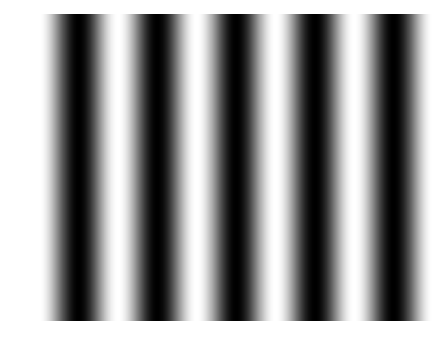

In [5]:
plt.imshow(sg_images[0,1,1,:,:],interpolation='nearest',cmap='gray')
plt.axis('off')

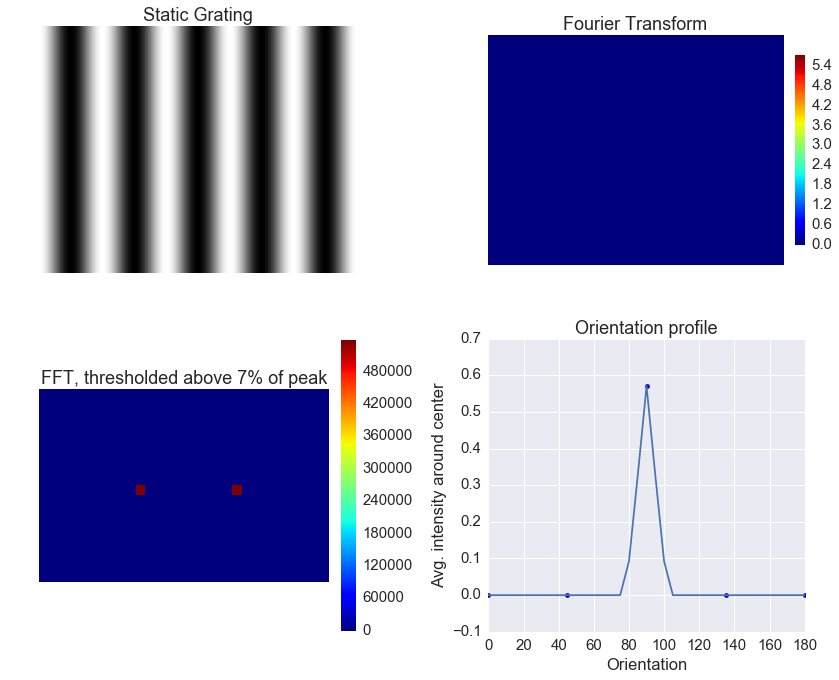

In [10]:
horiz_static_grating = sg_images[0,1,1,:,:]
str_id = '011'
pct = 0.07
pct_str = "7"
num_pie_slices = 72
theta = [2 * n * np.pi / num_pie_slices for n in range(num_pie_slices)]

shifted_img, log_fft_img = ft.log_fourier_transform(horiz_static_grating)

fig = plt.figure(figsize=(12,10))

a = fig.add_subplot(2,2,1)
plt.title("Static Grating")
plt.imshow(horiz_static_grating,cmap='gray',interpolation='nearest')
plt.axis('off')

a = fig.add_subplot(2,2,2)
im = a.imshow(log_fft_img,interpolation='nearest',cmap='jet')
plt.colorbar(im, fraction=0.03, pad=0.04)
plt.title("Fourier Transform")
plt.axis('off')

# now the big guns:
# get the raw fourier transformed image:
fft_raw = np.abs(fftpack.fftshift(fftpack.fft2(shifted_img)))
threshold = pct * np.max(fft_raw)
(x,y) = np.where(fft_raw > threshold)
fft_threshold = fft_raw * (fft_raw > threshold)

a = fig.add_subplot(2,2,3)
plt.title("FFT, thresholded above " + pct_str + "% of peak")
im = plt.imshow(fft_threshold[np.min(x)-10:np.max(x)+10,np.min(y)-10:np.max(y)+10],interpolation='nearest',cmap='jet')
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.axis('off')

a = fig.add_subplot(2,2,4)
M,N = fft_raw.shape
x_0,y_0 = float(M)/2, float(N)/2
r = np.hypot(x_0 - np.min(x), y_0 - np.min(y)) #overshooting a bit but that's ok.
theta_arr,intensity = ft.radial_image_intensity(log_fft_img, x_0, y_0, r, theta, num_interp_points=1000)
coarse_theta,coarse_intensity = ft.radial_image_intensity(log_fft_img, x_0, y_0, r, num_interp_points=1000)

plt.title("Orientation profile")
a.plot([t * 180/np.pi for t in theta_arr],intensity)
a.scatter([t * 180/np.pi for t in coarse_theta],coarse_intensity)
plt.xlabel('Orientation')
plt.ylabel('Avg. intensity around center')
plt.xlim(0,180)
plt.tight_layout()

fig.savefig('/Users/sekunder/python/SWDB/SWDB-KART/images/SG_orienation_profiles/SG_' + str_id + '_orientation_profile.png')

# plt.close(fig)

## Scratchwork, getting fourier transform in a useable state

In [ ]:
BEARSBEARSBEARS = imread('/Users/sekunder/python/SWDB/SWDB-KART/images/NS_stimulus_images/NS_0.png',flatten=True)
print(BEARSBEARSBEARS.shape)
plt.imshow(BEARSBEARSBEARS,cmap='gray',interpolation='nearest')

In [ ]:
BEARS_reduced = BEARSBEARSBEARS - np.mean(BEARSBEARSBEARS[:])
FFT_Bears = fftpack.fft2(BEARS_reduced)
FFT_shifted_Bears = np.abs(fftpack.fftshift(FFT_Bears))

max_magnitude = np.max(FFT_shifted_Bears)
print('max magnitude:',max_magnitude)
plt.figure()
plt.imshow(np.log(FFT_shifted_Bears))

percent = 0.08
theta = percent*max_magnitude
print('5% threshold:',theta)
FFT_thresholded = FFT_shifted_Bears * (FFT_shifted_Bears > theta)

(x,y) = np.where(FFT_shifted_Bears > theta)

plt.figure()
plt.imshow(FFT_thresholded[np.min(x)-10:np.max(x)+10,np.min(y)-10:np.max(y)+10],interpolation='nearest')
plt.colorbar()

In [ ]:
logbears,FFTbears, bear_spectrum = ft.log_fourier_transform(BEARSBEARSBEARS)
plt.figure()
plt.imshow(BEARSBEARSBEARS,cmap='gray')
plt.figure()
plt.imshow(logbears,cmap='gray')
plt.figure()
plt.imshow(FFTbears)
# ax[0].title('BEARS BEARS BEARS')
# ax[1].imshow(logbears)

## Misc scratchwork

In [ ]:
a = np.asarray([(1,2,3),(8,9,10)])
a[np.asarray([0,1,0]),np.asarray([1,2,2])]

In [ ]:
a.astype

In [ ]:
x, y = np.mgrid[-5:5:0.1, -5:5:0.1]
x0, y0 = 5, 4.5 # These are in _pixel_ coordinates!!
x1, y1 = 60, 75
z = np.sqrt(x**2 + y**2) + np.sin(x**2 + y**2)
interp_pixels,ds = ft.interpolated_pixels(z, x0,y0, x1,y1, num_steps=100)
fig, axes = plt.subplots(nrows=2)
axes[0].imshow(z)
axes[0].plot([x0, x1], [y0, y1], 'ro-')
axes[0].axis('image')

d = np.hypot(x1-x0, y1-y0)
axes[1].plot(np.linspace(0,d,100),interp_pixels)
axes[1].bar(np.linspace(0,d,100),interp_pixels,width=ds)


In [ ]:
axes[1].bar

In [ ]:
range(1,2.3,1)

In [ ]:
ft.interpolate_pixels_along_line(0,0,5,5)

In [ ]:
# Saving this for latter:
# def image_line_segment_integral(image, x_0, y_0, x_1, y_1):
# 	"""computes the integral over the line segment from (x_0,y_0) to (x_1,y_1) of the piecewise-constant function defined by image."""
# 	steep = np.abs(y_1 - y_0) > np.abs(x_1 - x_0)
# 	m = (y_1 - y_0) / (x_1 - x_0)
# 	b = y_0 / (m * x_0)
# 	x_asc = x_1 >= x_0; y_asc = y_1 >= y_0
# 	if steep:
# 		if y_asc:
# 			y_range = range(np.ceil(y_0),np.floor(y_1),1)
# 			if y_0 != np.ceil(y_0):
# 				y_range.insert(0,y_0)
# 			if y_1 != np.floor(y_1):
# 				y_range.append(y_1)
# 		else:
# 			y_range = range(np.floor(y_0),np.ceil(y_1),-1)
# 			if y_0 != np.floor(y_0):
# 				y_range.insert(0,y_0)
# 			if y_1 != np.ceil(y_1)
# 				y_range.append(y_1)
# 		y_arr = np.asarray(y_range)
# 		x_arr = (y_arr - b)/m
# 
# 		intensities = image[x_arr, y_arr]
# 	else:
# 		pass


In [ ]:
# something i got from stackoverflow:
# def interpolate_pixels_along_line(x0, y0, x1, y1):
# 	"""Uses Xiaolin Wu's line algorithm to interpolate all of the pixels along a
# 	straight line, given two points (x0, y0) and (x1, y1)

# 	Wikipedia article containing pseudo code that function was based off of:
# 		http://en.wikipedia.org/wiki/Xiaolin_Wu's_line_algorithm

# 	Copied from http://stackoverflow.com/questions/24702868/python3-pillow-get-all-pixels-on-a-line
# 	"""
# 	pixels = []
# 	steep = abs(y1 - y0) > abs(x1 - x0)

# 	# Ensure that the path to be interpolated is shallow and from left to right
# 	if steep:
# 		t = x0
# 		x0 = y0
# 		y0 = t

# 		t = x1
# 		x1 = y1
# 		y1 = t

# 	if x0 > x1:
# 		t = x0
# 		x0 = x1
# 		x1 = t

# 		t = y0
# 		y0 = y1
# 		y1 = t

# 	dx = x1 - x0
# 	dy = y1 - y0
# 	gradient = dy / dx  # slope

# 	# Get the first given coordinate and add it to the return list
# 	x_end = round(x0)
# 	y_end = y0 + (gradient * (x_end - x0))
# 	xpxl0 = x_end
# 	ypxl0 = round(y_end)
# 	if steep:
# 		pixels.extend([(ypxl0, xpxl0), (ypxl0 + 1, xpxl0)])
# 	else:
# 		pixels.extend([(xpxl0, ypxl0), (xpxl0, ypxl0 + 1)])

# 	interpolated_y = y_end + gradient

# 	# Get the second given coordinate to give the main loop a range
# 	x_end = round(x1)
# 	y_end = y1 + (gradient * (x_end - x1))
# 	xpxl1 = x_end
# 	ypxl1 = round(y_end)

# 	# Loop between the first x coordinate and the second x coordinate, interpolating the y coordinates
# 	for x in range(xpxl0 + 1, xpxl1):
# 		if steep:
# 			pixels.extend([(math.floor(interpolated_y), x), (math.floor(interpolated_y) + 1, x)])

# 		else:
# 			pixels.extend([(x, math.floor(interpolated_y)), (x, math.floor(interpolated_y) + 1)])

# 		interpolated_y += gradient

# 	# Add the second given coordinate to the given list
# 	if steep:
# 		pixels.extend([(ypxl1, xpxl1), (ypxl1 + 1, xpxl1)])
# 	else:
# 		pixels.extend([(xpxl1, ypxl1), (xpxl1, ypxl1 + 1)])

# 	return pixels